Expected Rating Model
=========================
# Goal: To predict the expected rating of a business based on price, reviews, categories, city, competition, and other engineered features.

# Loading in the data

In [1]:
import pandas as pd 
import numpy as np
df = pd.read_csv('/Users/nathanho/Desktop/Yelp-BI/data/clean/austin_clean.csv')
df.head()

,business_id,name,city,state,address,postal_code,rating,review_count,price,price_level,is_closed,categories_alias,categories_title,latitude,longitude,search_location,search_category
0,cs6HfZNykLVitm09jWFqWg,Moonshine Grill,Austin,TX,"303 Red River St, Austin, TX 78701",78701,4.4,6314,$$,2.0,f,"southern, breakfast_brunch, cocktailbars","southern, breakfast & brunch, cocktail bars",30.263754,-97.738077,"Austin, TX",restaurants
1,He2KYtXXfaIR0nkCXH5xiQ,Loro Asian Smokehouse & Bar,Austin,TX,"2115 S Lamar Blvd, Austin, TX 78704",78704,4.3,2497,$$,2.0,f,"smokehouse, asianfusion, cocktailbars","smokehouse, asian fusion, cocktail bars",30.247740,-97.771355,"Austin, TX",restaurants
2,Rba9Ol4jnTiov6_iAuoF5g,1618 Asian Fusion,Austin,TX,"1618 E Riverside Dr, Austin, TX 78741",78741,4.7,3856,$$,2.0,f,"vietnamese, thai, dimsum","vietnamese, thai, dim sum",30.245474,-97.730411,"Austin, TX",restaurants
3,BHZ9puL8YuHE-YEdkmxH-g,Canje,Austin,TX,"1914 E 6th St, Ste C, Austin, TX 78702",78702,4.5,574,$$$,3.0,f,caribbean,caribbean,30.261770,-97.722320,"Austin, TX",restaurants
4,YZs1gNSh_sN8JmN_nrpxeA,Terry Black's Barbecue,Austin,TX,"1003 Barton Springs Rd, Austin, TX 78704",78704,4.5,8396,$$,2.0,f,"bbq, sandwiches, southern","barbeque, sandwiches, southern",30.259692,-97.754801,"Austin, TX",restaurants


# EDA: Exploratory Data Analysis
The purpose of this EDA is to validate data quality, understand feature distributions,
and assess signal relevance for predicting Yelp ratings.

In [2]:
print(df.shape)
df.columns.tolist()
df.info()
df.describe(include='all')

(200, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   business_id       200 non-null    object 
 1   name              200 non-null    object 
 2   city              200 non-null    object 
 3   state             200 non-null    object 
 4   address           200 non-null    object 
 5   postal_code       200 non-null    int64  
 6   rating            200 non-null    float64
 7   review_count      200 non-null    int64  
 8   price             182 non-null    object 
 9   price_level       182 non-null    float64
 10  is_closed         200 non-null    object 
 11  categories_alias  200 non-null    object 
 12  categories_title  200 non-null    object 
 13  latitude          200 non-null    float64
 14  longitude         200 non-null    float64
 15  search_location   200 non-null    object 
 16  search_category   200 non-null    

,business_id,name,city,state,address,postal_code,rating,review_count,price,price_level,is_closed,categories_alias,categories_title,latitude,longitude,search_location,search_category
count,200,200,200,200,200,200.000000,200.000000,200.000000,182,182.000000,200,200,200,200.000000,200.000000,200,200
unique,200,187,1,1,199,NaN,NaN,NaN,4,NaN,1,168,168,NaN,NaN,1,1
top,cs6HfZNykLVitm09jWFqWg,Ramen Tatsu-Ya,Austin,TX,"500 W 5th St, Austin, TX 78701",NaN,NaN,NaN,$$,NaN,f,mexican,mexican,NaN,NaN,"Austin, TX",restaurants
freq,1,3,200,200,2,NaN,NaN,NaN,117,NaN,200,5,5,NaN,NaN,200,200
mean,NaN,NaN,NaN,NaN,NaN,78719.165000,4.274000,1048.805000,NaN,2.412088,NaN,NaN,NaN,30.289542,-97.740801,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,23.127086,0.236014,1124.890363,NaN,0.648387,NaN,NaN,NaN,0.040393,0.022076,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,78701.000000,3.800000,78.000000,NaN,1.000000,NaN,NaN,NaN,30.236097,-97.863070,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,78702.000000,4.100000,384.250000,NaN,2.000000,NaN,NaN,NaN,30.262192,-97.750108,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,78704.000000,4.300000,681.000000,NaN,2.000000,NaN,NaN,NaN,30.269570,-97.741581,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,78747.250000,4.400000,1292.000000,NaN,3.000000,NaN,NaN,NaN,30.312607,-97.727318,NaN,NaN


This provides a high-level overview of distributions, missingness,
and categorical cardinality across all features.

# Target Variable Analysis (Rating)

In [3]:
df["rating"].describe()
df["rating"].value_counts().sort_index()

rating
3.8     7
3.9    14
4.0    15
4.1    26
4.2    26
4.3    35
4.4    30
4.5    26
4.6    10
4.7     7
4.8     2
4.9     2
Name: count, dtype: int64

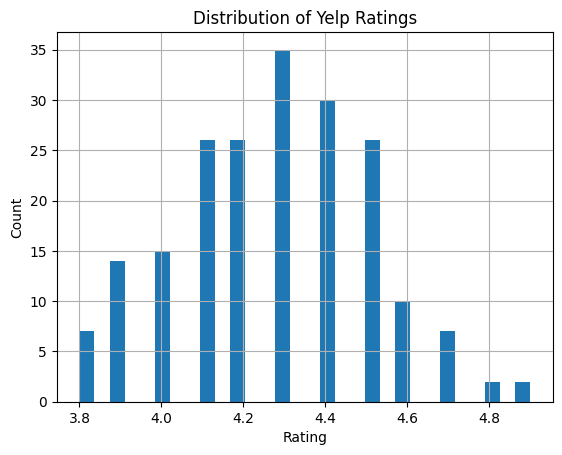

In [6]:
import matplotlib.pyplot as plt

df["rating"].hist(bins=30)
plt.title("Distribution of Yelp Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Yelp ratings exhibit a positive skew, which is expected due to platform bias.
The target variable remains suitable for regression modeling.

# Missing Data Analysis

In [7]:
missing = df.isna().sum().sort_values(ascending=False)
missing

price               18
price_level         18
search_location      0
longitude            0
latitude             0
categories_title     0
categories_alias     0
is_closed            0
business_id          0
name                 0
review_count         0
rating               0
postal_code          0
address              0
state                0
city                 0
search_category      0
dtype: int64

In [8]:
# Percentage of missing values
(df.isna().sum() / len(df)).sort_values(ascending=False)

price               0.09
price_level         0.09
search_location     0.00
longitude           0.00
latitude            0.00
categories_title    0.00
categories_alias    0.00
is_closed           0.00
business_id         0.00
name                0.00
review_count        0.00
rating              0.00
postal_code         0.00
address             0.00
state               0.00
city                0.00
search_category     0.00
dtype: float64

In [9]:
# How many rows have any missing values?
df.isna().any(axis=1).sum()
# Confirm missingness is only in price-related columns
df.loc[df.isna().any(axis=1), ["price", "price_level"]].head()

,price,price_level
19,NaN,NaN
24,NaN,NaN
25,NaN,NaN
27,NaN,NaN
49,NaN,NaN


# Missing Data Conclusion

Only price-related features (`price` and `price_level`) contain missing values,
affecting 18 out of 200 businesses (~9%).
Missingness is fully localized and occurs jointly across both fields.
No missing values are present in the target or other predictors.
These features will be retained and handled via imputation
within the preprocessing pipeline.

# Multicollinearity Analysis
Multicollinearity among numeric predictors was evaluated using correlation analysis
and Variance Inflation Factor (VIF).

In [12]:
NumericCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
NumericCols

['postal_code',
 'rating',
 'review_count',
 'price_level',
 'latitude',
 'longitude']

In [13]:
NumericCols.remove('rating')
NumericCols

['postal_code', 'review_count', 'price_level', 'latitude', 'longitude']

In [14]:
df[NumericCols].corr()

,postal_code,review_count,price_level,latitude,longitude
postal_code,1.000000,-0.055750,-0.167878,0.850890,0.192226
review_count,-0.055750,1.000000,-0.120966,-0.134231,0.017297
price_level,-0.167878,-0.120966,1.000000,-0.134601,-0.022731
latitude,0.850890,-0.134231,-0.134601,1.000000,0.198993
longitude,0.192226,0.017297,-0.022731,0.198993,1.000000


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import pandas as pd

# Drop rows with missing numeric values for VIF calculation
VIFdf = df[NumericCols].dropna()

# Add intercept
XVIF = np.column_stack([np.ones(len(VIFdf)), VIFdf.values])

VIFData = pd.DataFrame({
    "feature": ["intercept"] + NumericCols,
    "VIF": [variance_inflation_factor(XVIF, i) for i in range(XVIF.shape[1])]
})

VIFData


,feature,VIF
0,intercept,5.153432e+07
1,postal_code,3.786247e+00
2,review_count,1.059178e+00
3,price_level,1.048617e+00
4,latitude,3.863420e+00
5,longitude,1.046927e+00


### Multicollinearity Conclusion

Variance Inflation Factor (VIF) analysis indicates low multicollinearity among
numeric predictors. Geographic features exhibit moderate correlation, which is
expected. Although postal_code does not exceed standard VIF thresholds, it is
excluded from modeling because ZIP codes are identifiers rather than meaningful
numeric quantities. Latitude and longitude are retained to capture location effects. Multicollinearity is noted but not prohibitive for baseline linear modeling.

# Preprocessing Pipeline

Preprocessing is implemented using a ColumnTransformer with separate pipelines:

**Numeric Pipeline**
- Median imputation
- Standard scaling

**Categorical Pipeline**
- Most-frequent imputation
- One-hot encoding with unknown category handling

This approach ensures consistent preprocessing across training and evaluation.

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer